In [65]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from unicodedata import normalize


import spacy
import pandas as pd
import nltk
import numpy as np
import string
import emotion_analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re


warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords')
plt.style.use('seaborn')

[nltk_data] Downloading package rslp to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:

df = emotion_analysis.open_dataset('dataset.xlsx', 'xlsx')
df.Emoção = df.Emoção.str.lower()

In [67]:
df

,Comentarios,Emoção
0,Estou aqui para deixar minha análise ao Last D...,alegria
1,O jogo tem aproximadamente 4 horas de duração....,alegria
2,muito massa mano....gostei de mais....joguinho...,alegria
3,Que jogo maravilhoso! Zerado pela terceira vez...,alegria
4,A direção de arte desse jogo tá incrível,alegria
...,...,...
168,DETESTEI. Acho esse estilo de jogo super parad...,tristeza
169,"Cara que triste, mas ao mesmo tempo tão lindo ...",tristeza
170,"Acho esse estilo de jogo super parado e lento,...",tristeza
171,"Não é que o jogo é ruim, eu simplesmente não g...",tristeza


([<matplotlib.patches.Wedge at 0x7f00539f4910>,
 [Text(0.2475542709556223, 1.0717821060885606, 'alegria'),
  Text(-1.0538944842551305, -0.31512920533745, 'surpresa'),
  Text(0.5442236121148721, -0.95593967383755, 'tristeza')],
 [Text(0.13502960233943032, 0.5846084215028512, '42.8%'),
  Text(-0.5748515368664348, -0.17188865745679088, '23.7%'),
  Text(0.29684924297174836, -0.5214216402750271, '33.5%')])

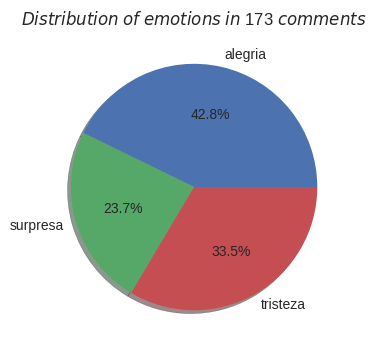

In [68]:
emotions = Counter(df.Emoção)
plt.figure(figsize=(9, 4))
plt.title(f'$Distribution $ $of$ $emotions$ $in$ {len(list(df.Emoção))} $comments$')
plt.pie(x=emotions.values(), labels=emotions.keys(),
        shadow=True, autopct='%1.1f%%')

In [69]:

!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [70]:
nlp = spacy.load("pt_core_news_sm")

In [71]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [72]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
def preprocessamento(text):
    result = []
    #pos_tag = ['ADJ'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    pos_tag = ['ADJ', 'VERB']
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = nlp(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()]) 
         
                
    #return result # 5
    return texto # 5



In [74]:


df.motivacao=df.Comentarios.astype(str)
df['Comentarios'] = df['Comentarios'].apply(preprocessamento)



In [75]:
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_characters)
print(df.head())
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_accents)
df.Comentarios = df.Comentarios.apply(emotion_analysis.tokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_stopwords)
df.Comentarios = df.Comentarios.apply(emotion_analysis.untokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.stemming)

                                         Comentarios   Emoção
0  deixar june emotivo joguei suarem diferente fe...  alegria
1                           sonora perfeita incrível  alegria
2                    massa manogostei oh lindo lindo  alegria
3                                 maravilhoso zerado  alegria
4                                           incrível  alegria


In [76]:
df

,Comentarios,Emoção
0,deix jun emot jog su difer feit perfeit,alegria
1,son perfeit incri,alegria
2,mass manogost lind lind,alegria
3,maravilh zer,alegria
4,incri,alegria
...,...,...
168,detest ach par fic lend,tristeza
169,trist lind unic,tristeza
170,ach par fic lend,tristeza
171,ruim gost,tristeza


In [77]:
motivo = df['Comentarios'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

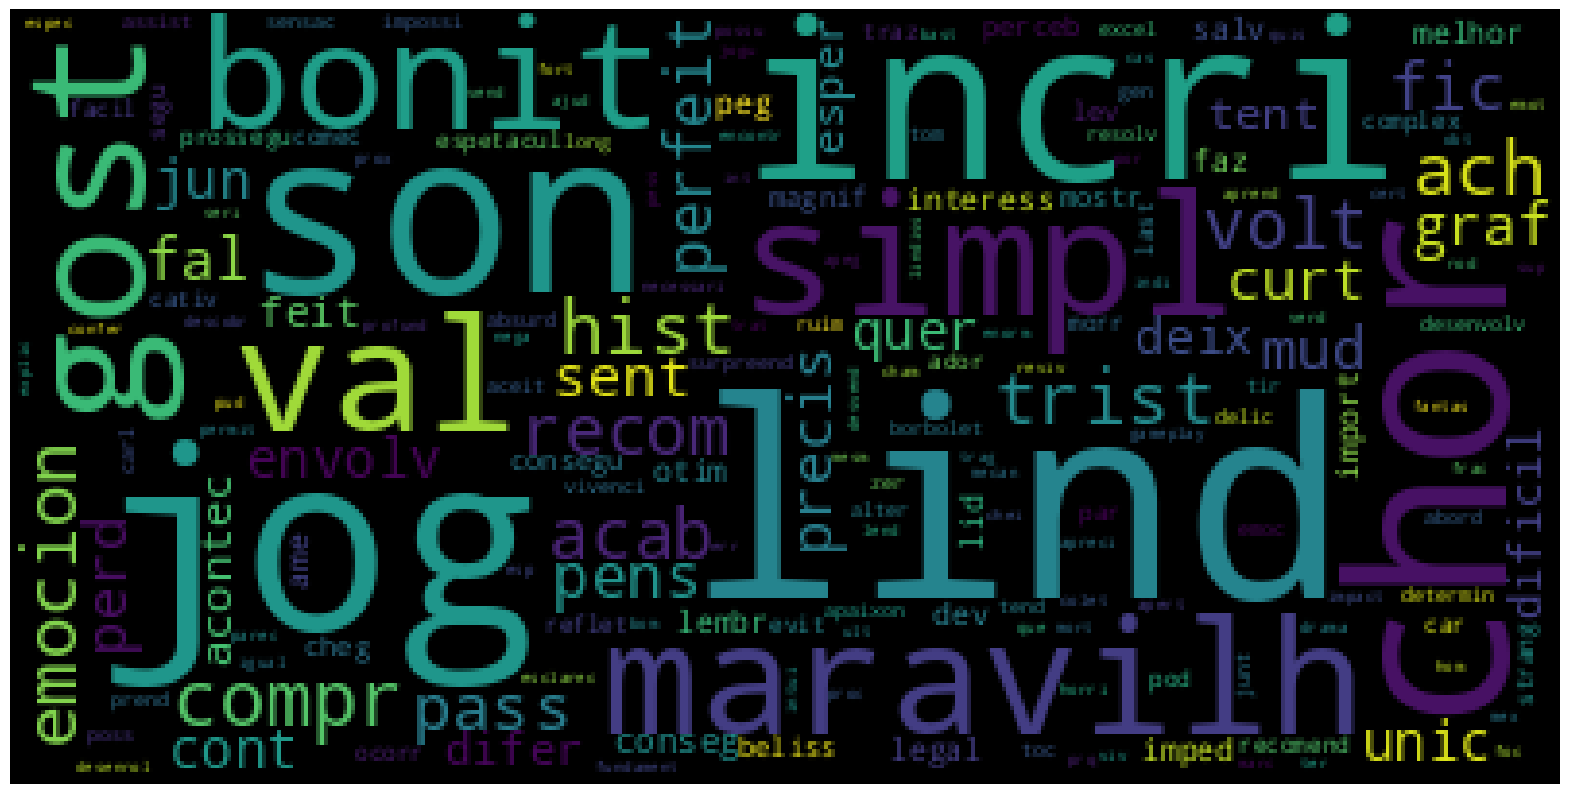

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(juntandotudo))

In [79]:
df

,Comentarios,Emoção
0,deix jun emot jog su difer feit perfeit,alegria
1,son perfeit incri,alegria
2,mass manogost lind lind,alegria
3,maravilh zer,alegria
4,incri,alegria
...,...,...
168,detest ach par fic lend,tristeza
169,trist lind unic,tristeza
170,ach par fic lend,tristeza
171,ruim gost,tristeza


In [80]:
X, y = df.Comentarios, df.Emoção
X = emotion_analysis.vectorizer(X, 'tfidf')

In [81]:
train_size = .8
X_train, X_test, y_train, y_test = emotion_analysis.dataset_split(X, y, train_size)

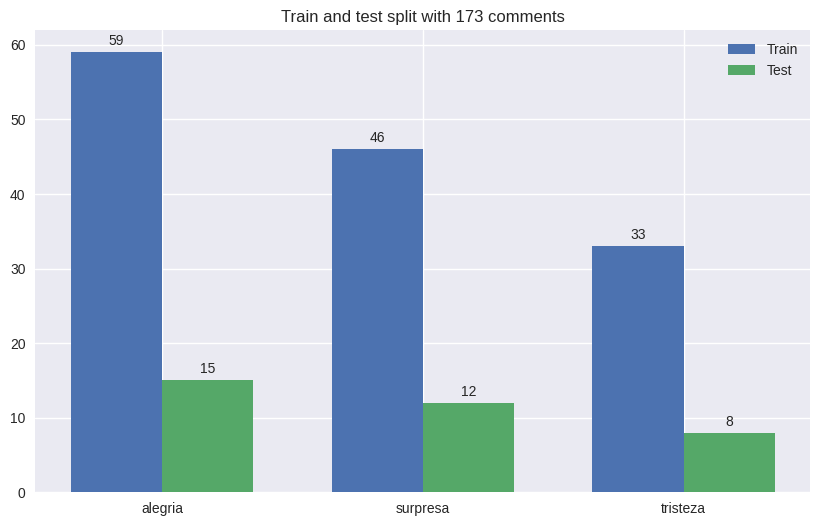

In [82]:
labels =  ['ALEGRIA', 'TRISTEZA', 'SURPRESA']
emotion_analysis.emotion_plot(y_train, y_test, emotions)

In [83]:
n_fold = 10
NB  = emotion_analysis.cv_train(classifier_name='NB',  X=X_train, y= y_train, n_fold=n_fold)
SVM = emotion_analysis.cv_train(classifier_name='SVM', X=X_train, y= y_train, n_fold=n_fold)
KNN = emotion_analysis.cv_train(classifier_name='KNN', X=X_train, y= y_train, n_fold=n_fold)

pred_nb  = NB.predict(X_test)   # Naive Bayes prediction
pred_svm = SVM.predict(X_test)  # SVM prediction
pred_knn = KNN.predict(X_test)  # KNN prediction

Naive Bayes best parameters: {'alpha': 1, 'fit_prior': False}
Naive Bayes best accuracy in 10 folds: 57.967032967032964
Support Vector Machine best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Support Vector Machine best accuracy in 10 folds: 56.48351648351648
K-Nearest Neighbors best parameters: {'algorithm': 'auto', 'n_neighbors': 2}
K-Nearest Neighbors best accuracy in 10 folds: 48.626373626373635


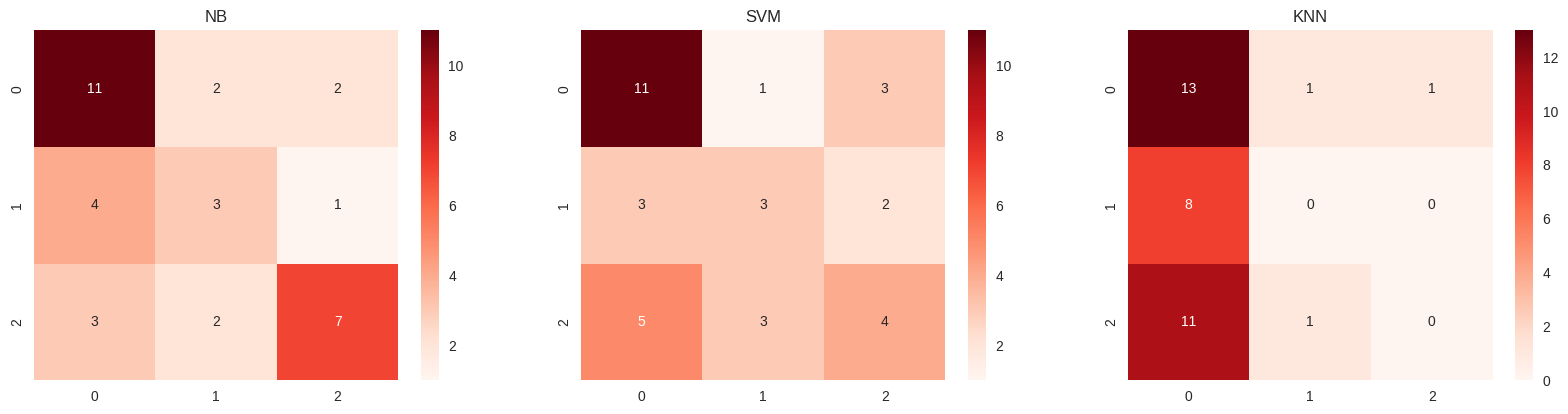

In [84]:
list_predict = [pred_nb, pred_svm, pred_knn]
models_names = ['NB', 'SVM', 'KNN']
'''OBS:
        0 = ALEGRIA
        1 = SURPRESA
        2 = TRISTEZA
'''
emotion_analysis.confusion_matrix_plot(list_predict = list_predict,
                                  models_names = models_names, 
                                  y_true       = y_test)

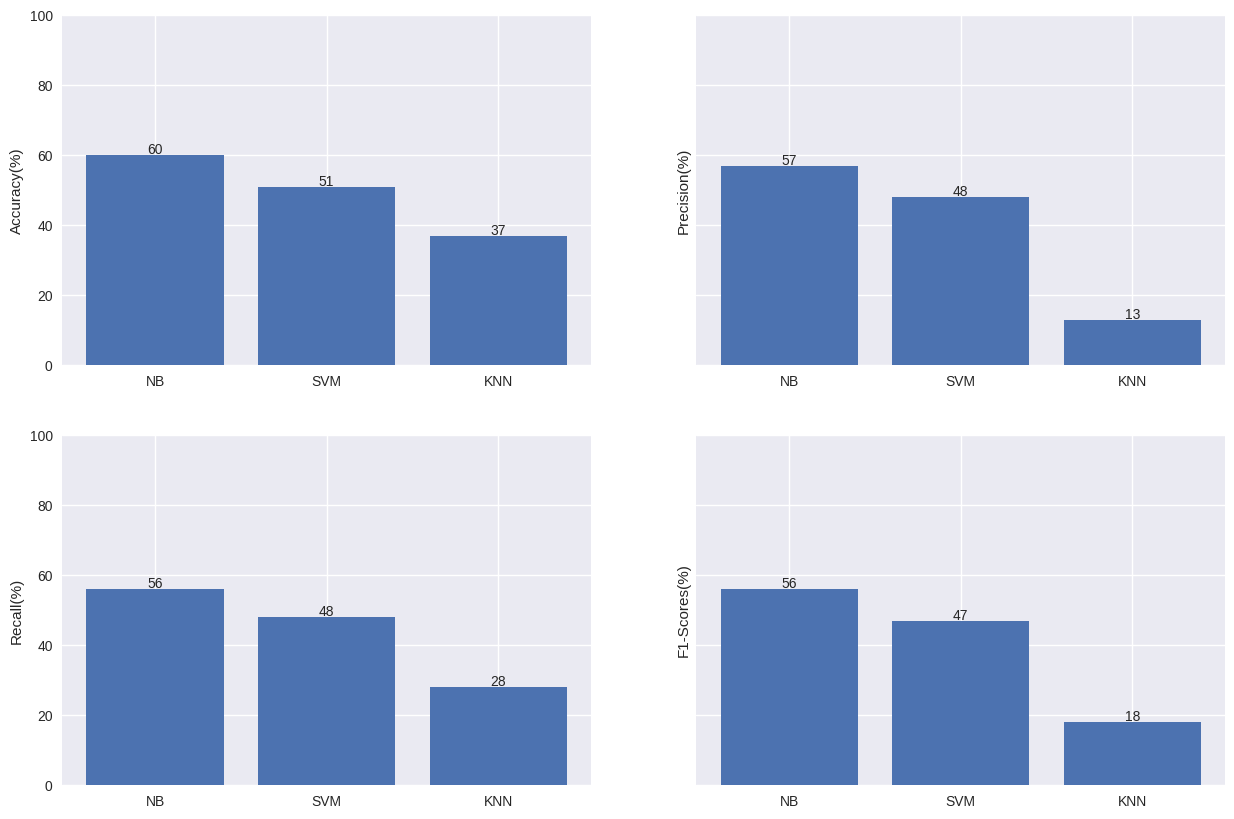

In [85]:
emotion_analysis.metrics_evaluation(models_names=models_names,
                   list_predict=list_predict,
                   y_true = y_test)

##### Melhor classificação pro NV porém ainda menor 
+ Conclusão = Pré-processamento com spacy deste código não tem um desempenho tão bom em relação a classificaço